In [260]:
import sampler as sm
import survey
from importlib import reload 
import mass_function as mf
import mass_profile as mp
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import scipy
import pandas as pd
import psutil
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
values = psutil.virtual_memory()
total = values.total >> 30
total

24

In [264]:
r = survey.Roman()

In [3]:
%%time
ps = mp.PointSource(Ml=1)
gauss = mp.Gaussian(Ml=1.e6*u.Msun,R0=0.01*u.kpc)
nfw = mp.NFW(Ml=1.e5*u.Msun, c200= 13)

CPU times: user 808 µs, sys: 8 µs, total: 816 µs
Wall time: 820 µs


In [261]:
%%time
nfw = mp.NFW(Ml=1.e5*u.Msun, c200= 13)

CPU times: user 1.06 ms, sys: 588 µs, total: 1.65 ms
Wall time: 2.49 ms


In [117]:
%%time
ps = mp.PointSource(Ml=1)

CPU times: user 11 µs, sys: 6 µs, total: 17 µs
Wall time: 19.1 µs


In [ ]:
pl = mf.PowerLaw(m_l = np.logspace(0, np.log10(1000), 100))

In [110]:
%%time
cdm = mf.CDM_Test(m_l = np.logspace(0,6,10))

CPU times: user 900 µs, sys: 44 µs, total: 944 µs
Wall time: 912 µs


In [258]:
%%time
pbh = mf.PBH(m_l = np.logspace(0,6,10))

CPU times: user 1.05 ms, sys: 1.35 ms, total: 2.4 ms
Wall time: 2.36 ms


In [263]:
wdm = mf.WDM_stream(m_l = np.logspace(0,7,100))

In [ ]:
tinker = mf.Tinker(m_l = np.logspace(0, np.log10(1000), 20))

In [90]:
%%time
press_s=mf.PressSchechter_test(m_l=np.logspace(6,14,10))

CPU times: user 13.3 ms, sys: 617 µs, total: 13.9 ms
Wall time: 13.6 ms


## Sampling

In [ ]:
%%time
s = sm.Sampler(nstars=100,survey=r, MassFunction=pl)

In [ ]:
%%time
s = sm.Sampler(nstars=1000, survey=r,nchains=20, MassFunction=pl, MassProfile=nfw)

In [ ]:
s = sm.Sampler(nstars=1000, nsamples=10, survey=r,nchains=8, MassFunction=cdm, MassProfile=gauss)

Creating data vector
Wrote to /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_3_2_0.dat
/Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0.png
(1000, 2)
2024-03-17T16:08:57.573380: made /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0.png
Loading prior
Prior loaded
Total pars: 4
Sampling..


/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/astropy/units/quantity.py:620: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/astropy/units/quantity.py:620: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/fangirl/Repos/Kris/dmsl/dmsl/mass_function.py:227: RuntimeWarning: invalid value encountered in cast
  self.n_l = (hist*norm).astype(int)
/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/astropy/units/quantity.py:620: RuntimeWarning: overflow encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/numpy/lib/function_base.py:1248: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)]

In [111]:
%%time
s = sm.Sampler(nstars=1000, nsamples=9000, survey=r,nchains=64, MassFunction=cdm, MassProfile=nfw)

Creating data vector
Wrote to /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_3_2_0.dat
/Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0.png
(1000, 2)
2024-04-06T22:11:39.081365: made /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0.png
Loading prior
Prior loaded
Total pars: 4
Sampling..


  3%|█████▎                                                                                                                                                                                            | 276/10000 [40:16<21:44:21,  8.05s/it]/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/astropy/units/quantity.py:620: RuntimeWarning: invalid value encountered in add
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 7700/10000 [16:10:17<4:27:25,  6.98s/it]

Converged at.. 7700


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [20:58:04<00:00,  7.55s/it]


95\% upper limit on c200: 2.990894144663971
95\% upper limit on loga: 2.3556390092290096
95\% upper limit on b: -0.4544015926665841
95\% upper limit on logc: 11.434036479093095
Wrote /Users/fangirl/Repos/Kris/dmsl/results/samples_Roman_nfw_CDM_3_3_2.pkl
Chains have been pruned. 61.0 chains remain
Wrote /Users/fangirl/Repos/Kris/dmsl/results/loglike_Roman_nfw_CDM_3_3_2.pkl
Wrote /Users/fangirl/Repos/Kris/dmsl/results/pruned_samples_Roman_nfw_CDM_3_3_2.pkl
Chains have been pruned. 61.0 chains remain
flatchain: (549000, 4)
loga
2024-04-07T19:10:01.648846: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_CDM_loga_3_3_2.png
b
2024-04-07T19:10:01.730847: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_CDM_b_3_3_2.png
logc
2024-04-07T19:10:01.807853: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_CDM_logc_3_3_2.png
2024-04-07T19:10:01.882566: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_CDM_c200_3_3_2.png
2024-04-07T19:10:06.719780: made /Users/f

In [32]:
s.data.shape

(1000, 2)

In [105]:
cdm_32 = s

In [106]:
cdm_32

In [118]:
cdm_64 =s

In [35]:
np.shape(s.flatchain)

(288000, 4)

In [36]:
r.alphasigma.value

0.1

In [64]:
s.samplealphal(s.flatchain[0]).shape

(1000, 2)

In [ ]:
# https://stackoverflow.com/questions/35215161/most-efficient-way-to-map-function-over-numpy-array

In [80]:
%%time
cdm_data = [s.samplealphal(ftch) for ftch in s.flatchain[:100]]

CPU times: user 24 s, sys: 76.6 ms, total: 24.1 s
Wall time: 24.1 s


In [81]:
len(cdm_data), len(cdm_data[0])

(100, 1000)

In [82]:
%%time
cdm_data = list(map(lambda x: s.samplealphal(x), s.flatchain[:100]))

CPU times: user 24 s, sys: 93.6 ms, total: 24 s
Wall time: 24.1 s


In [83]:
len(cdm_data), len(cdm_data[0])

(100, 1000)

In [84]:
%%time
cdm_data = list(map(s.samplealphal, s.flatchain[:100]))

CPU times: user 23.8 s, sys: 78.1 ms, total: 23.9 s
Wall time: 23.9 s


In [85]:
len(cdm_data), len(cdm_data[0])

(100, 1000)

In [97]:
%%time
cdm_data = np.apply_along_axis(lambda x: s.samplealphal(x), 1, s.flatchain[:100]).value.tolist()

CPU times: user 23.8 s, sys: 40.7 ms, total: 23.9 s
Wall time: 23.9 s


In [98]:
len(cdm_data), len(cdm_data[0]), len(cdm_data[0][0])

(100, 1000, 2)

In [99]:
%%time
cdm_data = np.apply_along_axis(s.samplealphal, 1, s.flatchain[:100]).value.tolist()

CPU times: user 23.6 s, sys: 41.6 ms, total: 23.7 s
Wall time: 23.7 s


In [100]:
len(cdm_data), len(cdm_data[0]), len(cdm_data[0][0])

(100, 1000, 2)

In [12]:
s = sm.Sampler(nstars=10, nsamples=10, survey=r,nchains=8, MassProfile=gauss)

NameError: name 'gauss' is not defined

In [270]:
%%time
s = sm.Sampler(nstars=1000,nsamples=1000,nchains=16, survey=r, MassFunction=cdm, MassProfile=nfw)

Creating data vector
Wrote to /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_3_2_0.dat
/Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0.png
(1000, 2)
2024-03-05T16:28:33.468273: made /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0.png
Loading prior
Prior loaded
Total pars: 4
Sampling..


  1%|██▋                                                                                                                                                                                                  | 27/2000 [01:18<1:29:57,  2.74s/it]Traceback (most recent call last):
  File "/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/Users/fangirl/Repos/Kris/dmsl/dmsl/sampler.py", line 359, in lnlike
    alphal = self.samplealphal(pars) #FIXME for mf, gets array of alphal
  File "/Users/fangirl/Repos/Kris/dmsl/dmsl/sampler.py", line 332, in samplealphal
    alphal = lm.alphal(newmassprofile, bvec, vvec) #FIXME Test if it works for new_mass function and newmassprofile array-- for loop instead?
  File "/Users/fangirl/Repos/Kris/dmsl/dmsl/lensing_model.py", line 32, in alphal
    vec_part = alphal_vec(Ml, bvec, vvec)
  File "/Users/fangirl/Repos/Kris/dmsl/dmsl/lensing_model.py", 

emcee: Exception while calling your likelihood function:
  params: [ 0.96050506 -2.94191101 -1.43763373  2.42146997]
  args: []
  kwargs: {}
  exception:


AttributeError: 'list' object has no attribute 'M'

In [265]:
%%time
s = sm.Sampler(nstars=1000,nsamples=10000, survey=r,nchains=32, MassFunction=wdm, MassProfile=nfw)

Creating data vector
CDM data: <class 'astropy.units.quantity.Quantity'> [[-2.47662034e-09  6.81600487e-09]
 [-1.74052383e-08 -4.23364750e-08]
 [-6.89713465e-09  5.57995110e-09]
 ...
 [ 1.11353855e-07 -2.24930853e-07]
 [ 2.76615666e-07 -6.85611702e-07]
 [-1.59219238e-09 -8.14065846e-09]] uas / yr2
Wrote to /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_3_2_0_2024:04:25-17.14.43.dat
/Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0_2024:04:25-17.14.43.png
(1000, 2)
2024-04-25T17:14:45.370921: made /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0_2024:04:25-17.14.43.png
Loading prior
Prior loaded
Total pars: 4
Sampling..


  1%|█▋                                                                                                                                                                                                  | 95/11000 [01:13<1:40:33,  1.81it/s]/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/astropy/units/quantity.py:620: RuntimeWarning: invalid value encountered in add
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
 58%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                  | 6400/11000 [50:12<41:20,  1.85it/s]

Converged at.. 6400


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11000/11000 [1:26:46<00:00,  2.11it/s]


95\% upper limit on fpbh: 2.9637117512594235
Wrote /Users/fangirl/Repos/Kris/dmsl/results/samples_Roman_nfw_WDM Stream_3_4_2_2024:04:25-18.41.33.pkl
Chains have been pruned. 32.0 chains remain
Wrote /Users/fangirl/Repos/Kris/dmsl/results/loglike_Roman_nfw_WDM Stream_3_4_2_2024:04:25-18.41.33.pkl
Wrote /Users/fangirl/Repos/Kris/dmsl/results/pruned_samples_Roman_nfw_WDM Stream_3_4_2_2024:04:25-18.41.33.pkl
Chains have been pruned. 32.0 chains remain
flatchain: (320000, 4)
m_wdm
2024-04-25T18:41:34.226687: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_WDM Stream_m_wdm_3_4_2_2024:04:25-18.41.33.png
gamma
2024-04-25T18:41:34.313566: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_WDM Stream_gamma_3_4_2_2024:04:25-18.41.34.png
beta
2024-04-25T18:41:34.395342: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_WDM Stream_beta_3_4_2_2024:04:25-18.41.34.png
2024-04-25T18:41:34.470401: made /Users/fangirl/Repos/Kris/dmsl/results/post_Roman_nfw_WDM Stream_c200_3_4_

In [99]:
%%time
s = sm.Sampler(nstars=10,nsamples=10,nchains=4, survey=r, MassFunction=press_s, MassProfile=nfw)

Creating data vector
Wrote to /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_1_2_0.dat
/Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_1_2_0.png
(10, 2)
2024-02-28T11:46:41.745930: made /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_1_2_0.png
Loading prior
Prior loaded
Total pars: 2
Sampling..


 12%|██████████████████████▉                                                                                                                                                                               | 117/1010 [00:05<00:38, 23.28it/s]/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/astropy/units/quantity.py:620: RuntimeWarning: invalid value encountered in add
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1010/1010 [00:48<00:00, 20.75it/s]


Wrote /Users/fangirl/Repos/Kris/dmsl/results/samples_Roman_nfw_Press Schechter_1_1_2.pkl
Chains have been pruned. 0.0 chains remain
Wrote /Users/fangirl/Repos/Kris/dmsl/results/loglike_Roman_nfw_Press Schechter_1_1_2.pkl
Wrote /Users/fangirl/Repos/Kris/dmsl/results/pruned_samples_Roman_nfw_Press Schechter_1_1_2.pkl
Chains have been pruned. 0.0 chains remain
flatchain: (0,)
del_crit


IndexError: cannot do a non-empty take from an empty axes.

<Figure size 600x400 with 0 Axes>

In [ ]:
%%time
s = sm.Sampler(nstars=10, survey=r,nchains=18, MassFunction=tinker, MassProfile=nfw)

In [259]:
%%time
s = sm.Sampler(nstars=1000, survey=r,nchains=16, MassFunction=pbh, MassProfile=ps)

Creating data vector
Wrote to /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_3_2_0_2024:04:22-20.02.59.dat
/Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0_2024:04:22-20.02.59.png
(1000, 2)
2024-04-22T20:02:59.424403: made /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0_2024:04:22-20.02.59.png
Loading prior
Prior loaded
Total pars: 1
Sampling..


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [3:41:21<00:00,  6.64s/it]

95\% upper limit on fpbh: -1.4808324475843144
Wrote /Users/fangirl/Repos/Kris/dmsl/results/samples_Roman_ps_PBH_3_3_2_2024:04:22-23.44.28.pkl
Chains have been pruned. 0.0 chains remain
Wrote /Users/fangirl/Repos/Kris/dmsl/results/loglike_Roman_ps_PBH_3_3_2_2024:04:22-23.44.28.pkl
Wrote /Users/fangirl/Repos/Kris/dmsl/results/pruned_samples_Roman_ps_PBH_3_3_2_2024:04:22-23.44.28.pkl
Chains have been pruned. 0.0 chains remain
CPU times: user 3h 40min 56s, sys: 29.1 s, total: 3h 41min 25s
Wall time: 3h 41min 29s


In [189]:
pbh = s

In [219]:
d = s.data.data
d.shape

(1000, 2)

In [213]:
d.head()

,a_x,a_y
0,0.012573,-0.013210
1,0.064042,0.010490
2,-0.053567,0.036160
3,0.130400,0.094708
4,-0.070374,-0.126542


In [220]:
import plotting as plot
plot.make_histogram(d.to_numpy(),int(len(d) / 100) + 1, r'\alpha', '../data/star_accel/Roman_pbh3.png')

2024-04-14T20:51:08.954917: made ../data/star_accel/Roman_pbh3.png


[[ 0.01257302 -0.01321049]
 [ 0.06404227  0.01049001]
 [-0.05356694  0.03615951]
 ...
 [ 0.12497253  0.0750634 ]
 [-0.05558157 -0.20188116]
 [-0.09094276  0.03692293]]


(array([[  1.,   7.,  19.,  62., 162., 221., 224., 180.,  91.,  29.,   4.],
        [  1.,   3.,  14.,  64., 154., 237., 253., 158.,  85.,  24.,   7.]]),
 array([-0.38994217, -0.32661982, -0.26329747, -0.19997512, -0.13665277,
        -0.07333042, -0.01000807,  0.05331428,  0.11663662,  0.17995897,
         0.24328132,  0.30660367]),
 <a list of 2 Lists of Patches objects>)

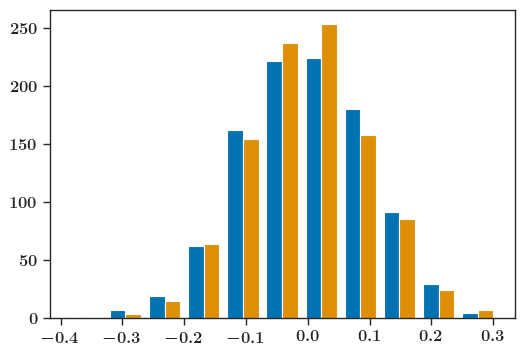

In [205]:
print(d[0:])
plt.hist(d, int(len(d) / 100) + 1)

## Chisq check

Text(0, 0.5, 'logL')

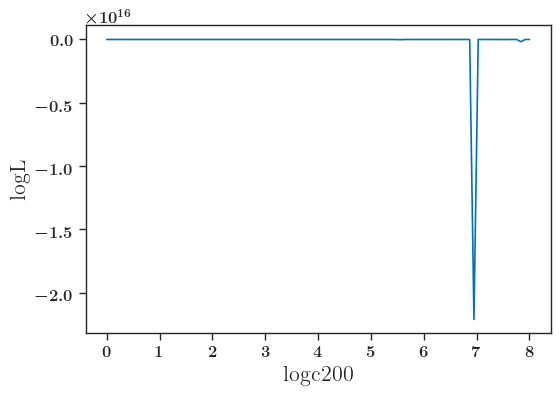

In [136]:
## Computing chisq at high c200 vals, fiducial loga=-4.49, b=-1.9, logc= 7.41
c200 = np.logspace(0,8,100)
chisq = []
for i in range(len(c200)):
    chisq.append(cdm_64.lnlike([np.log10(c200[i]),-3.1,-3.95,6.02]))
plt.plot(np.log10(c200),chisq)
#plt.xlim([0,4])
#plt.yscale('symlog')
plt.xlabel(r'logc200')
plt.ylabel(r'logL')

In [203]:
chisq

[-37594.080924395894,
 -inf,
 -37594.080898226464,
 -inf,
 -37594.08062299494,
 -37594.08121937506,
 -37594.08016543627,
 -37594.08093914086,
 -37594.08012411741,
 -37594.08278072151,
 -37594.0817171707,
 -37594.0791198161,
 -37594.08205136389,
 -37594.07977763513,
 -37594.076651971445,
 -37594.09129145827,
 -37594.099525839636,
 -37594.03266772265,
 -37594.09610205032,
 -37594.07124317826,
 -37594.08338569483,
 -37594.07834199637,
 -37594.05343340839,
 -37594.092616761096,
 -37594.09094342385,
 -37593.9123002888,
 -37594.18773247938,
 -37594.177965998475,
 -37593.89600692629,
 -37667.304187483016,
 -38590.712721967575,
 -37594.54789118786,
 -37595.798323351046,
 -37625.51412396371,
 -37592.953602373884,
 -37598.12172567468,
 -37597.2995217148,
 -37695.63809861639,
 -37646.30141629217,
 -38144.41738198436,
 -37901.53958530592,
 -37608.57179461385,
 -144219.99407913865,
 -451231.04098252044,
 -39078.73577959987,
 -42946.120482705206,
 -121294.92208899777,
 -85734.66176737679,
 -311627.3

In [169]:
c200

array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+00, 5.72236766e+00,
       6.42807312e+00, 7.22080902e+00, 8.11130831e+00, 9.11162756e+00,
       1.02353102e+01, 1.14975700e+01, 1.29154967e+01, 1.45082878e+01,
       1.62975083e+01, 1.83073828e+01, 2.05651231e+01, 2.31012970e+01,
       2.59502421e+01, 2.91505306e+01, 3.27454916e+01, 3.67837977e+01,
       4.13201240e+01, 4.64158883e+01, 5.21400829e+01, 5.85702082e+01,
       6.57933225e+01, 7.39072203e+01, 8.30217568e+01, 9.32603347e+01,
       1.04761575e+02, 1.17681195e+02, 1.32194115e+02, 1.48496826e+02,
       1.66810054e+02, 1.87381742e+02, 2.10490414e+02, 2.36448941e+02,
       2.65608778e+02, 2.98364724e+02, 3.35160265e+02, 3.76493581e+02,
       4.22924287e+02, 4.75081016e+02, 5.33669923e+02, 5.99484250e+02,
      

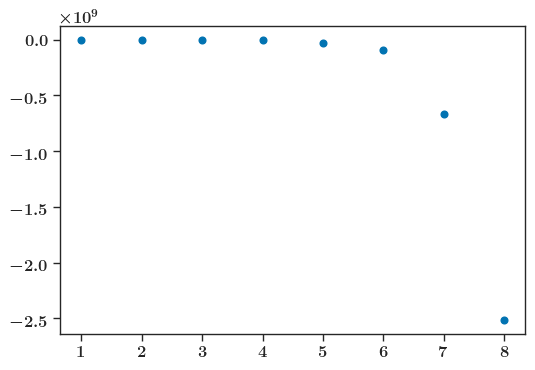

In [138]:
y, _ = cdm_64.sampler.compute_log_prob(np.array(([1,-3.41,-3.03,6.45],[2,-3.41,-3.03,6.45],[3,-3.41,-3.03,6.45],[4,-3.41,-3.03,6.45],[5,-3.41,-3.03,6.45],[6,-3.41,-3.03,6.45],[7,-3.41,-3.03,6.45],[8,-3.41,-3.03,6.45])))
plt.plot([1,2,3,4,5,6,7,8],y,'o')

In samplealpha
In make new mass
In lensing model
Outside lensing model
Trying
In samplealpha
In make new mass
In lensing model
Outside lensing model
Trying
In samplealpha
In make new mass
In lensing model
Outside lensing model
Trying
In samplealpha
In make new mass
In lensing model
Outside lensing model
Trying
In samplealpha
In make new mass
In lensing model
Outside lensing model
Trying
In samplealpha
In make new mass
In lensing model
Outside lensing model
Trying
In samplealpha
In make new mass
In lensing model
Outside lensing model
Trying
In samplealpha
In make new mass
In lensing model
Outside lensing model
Trying
CPU times: user 1h 4min 23s, sys: 14.5 s, total: 1h 4min 38s
Wall time: 4h 5min 55s


Text(0, 0.5, 'logL')

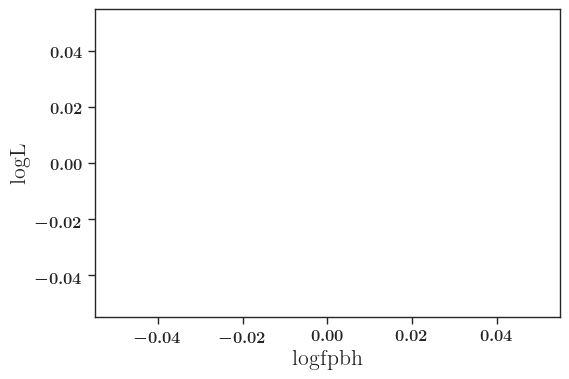

In [233]:
%%time
f_pbh = np.logspace(-8,0,10)
chisq = []
for i in range(len(f_pbh)):
    chisq.append(pbh.lnlike([np.log10(f_pbh[i])]))
plt.plot(np.log10(f_pbh),chisq)
#plt.xlim([0,4])
#plt.yscale('symlog')
plt.xlabel(r'logfpbh')
plt.ylabel(r'logL')

In [234]:
chisq

[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf]

In [235]:
f_pbh

array([1.00000000e-08, 7.74263683e-08, 5.99484250e-07, 4.64158883e-06,
       3.59381366e-05, 2.78255940e-04, 2.15443469e-03, 1.66810054e-02,
       1.29154967e-01, 1.00000000e+00])

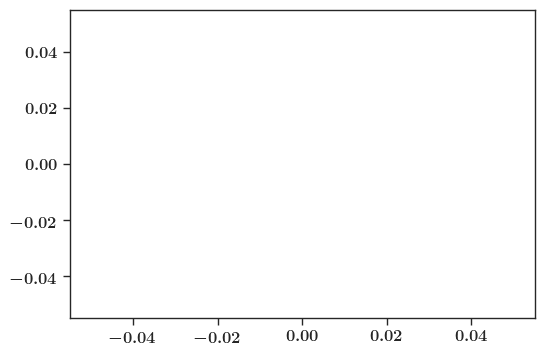

In [237]:
y_pbh, _= pbh.sampler.compute_log_prob(np.array(([1.0],[1e-2],[1e-4],[1e-6],[1e-8])))
plt.plot([1.0,1e-2,1e-4,1e-6,1e-8],y_pbh,'o')

In [238]:
y_pbh

array([-inf, -inf, -inf, -inf, -inf])